<a href="https://colab.research.google.com/github/faiggafarov/PCA-Eigenvector/blob/main/pca_using_eigenvector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA : Principal Component Analysis

>
Principal Component Analysis (PCA) is a powerful technique often used in data analysis to simplify complex, high-dimensional datasets. It does this by reducing the number of variables, which makes the data easier to understand and interpret, while still preserving as much of the original information as possible. The core idea is to create new variables—called principal components—that are uncorrelated and capture the most variance in the dataset. These components are calculated through an ***eigenvalue/eigenvector*** problem, which essentially identifies the directions in the data where the most significant patterns or differences exist. PCA is particularly useful in areas like machine learning, image processing, and data visualization, where large datasets can overwhelm analysis. By focusing on the key components, it helps reveal the underlying structure of the data in a more accessible way.

**Eigen Vector Decomposition (EVD) - Eigen Values and Eigen Vectors**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
df = pd.read_csv('iris.csv')
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [3]:
df.columns=['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Scatter Plot**

In [5]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
df_setosa = df[df.Species == 'Iris-setosa']
df_versicolor = df[df.Species == 'Iris-versicolor']
df_virginica = df[df.Species == 'Iris-virginica']

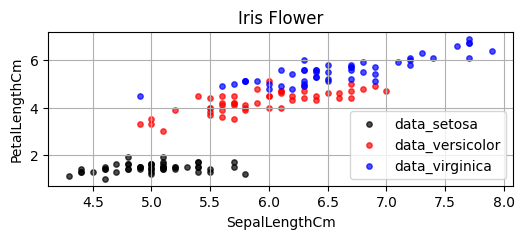

In [7]:
plt.figure(figsize = (6,2))
plt.scatter(df_setosa["SepalLengthCm"], df_setosa["PetalLengthCm"], color = "black", s = 15, alpha = 0.7, label = "data_setosa")
plt.scatter(df_versicolor["SepalLengthCm"], df_versicolor["PetalLengthCm"], color = "red", s = 15, alpha = 0.7, label = "data_versicolor")
plt.scatter(df_virginica["SepalLengthCm"], df_virginica["PetalLengthCm"], color = "blue", s = 15, alpha = 0.7, label = "data_virginica")
plt.title("Iris Flower")
plt.xlabel("SepalLengthCm")
plt.ylabel("PetalLengthCm")
plt.grid(True)
plt.legend()
plt.show()

In [8]:
print(df.isnull().values.any())

False


In [9]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [10]:
df = df.drop(columns=['Id'])

**Boxplot**

array([[<Axes: title={'center': 'PetalLengthCm'}, xlabel='[Species]'>,
        <Axes: title={'center': 'PetalWidthCm'}, xlabel='[Species]'>],
       [<Axes: title={'center': 'SepalLengthCm'}, xlabel='[Species]'>,
        <Axes: title={'center': 'SepalWidthCm'}, xlabel='[Species]'>]],
      dtype=object)

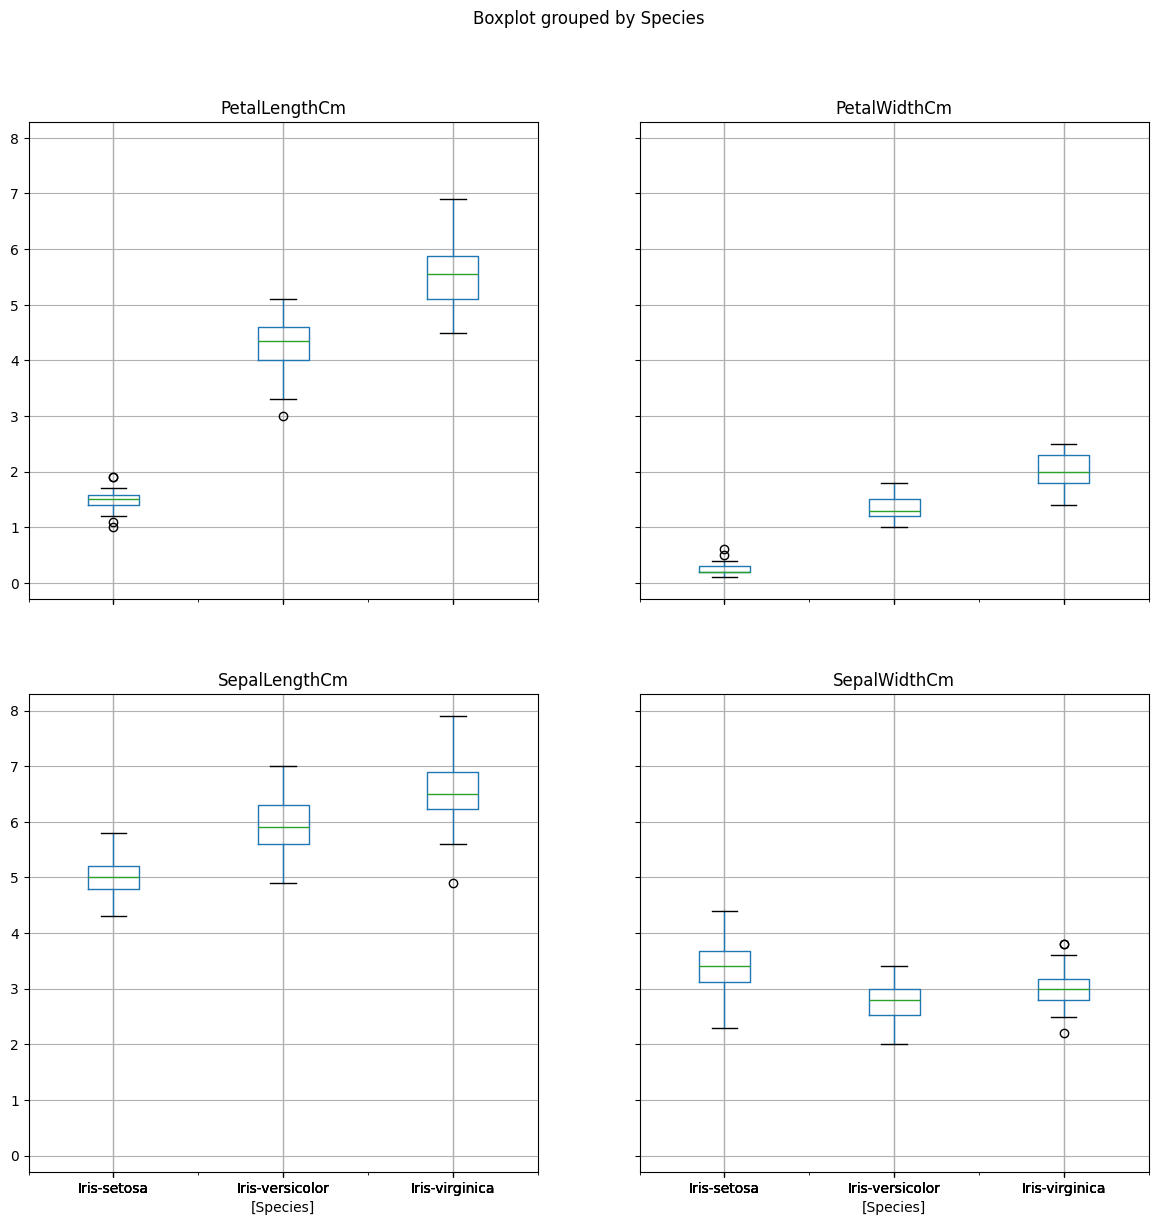

In [11]:
df.boxplot(by="Species", layout=(2, 2), figsize=(14, 14))

The boxplots reveal several insights, including that virginica has the largest median petal length. The data also contains only a few outliers.

In [12]:
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

In [13]:
X.shape, y.shape;


Each row of the matrix, denoted as **𝑥**, can be thought of as a **4-dimensional vector**, which encapsulates the values for the four features for a single flower sample. As illustrated in the above screenshot of the **𝑥** output values, this transformation helps to visualize the data more effectively in a higher-dimensional space, aiding in further analysis like dimensionality reduction and pattern recognition.

# **Standardization data:**

When the features of a dataset have different measurement scales, it's important to standardize the data, ensuring that all features have a mean of 0 and variance of 1.

Standardization is especially important before performing PCA, as PCA is very sensitive to the variance in the data. If there are large differences in the feature scales, the features with larger ranges will have a greater influence, overshadowing those with smaller ranges.


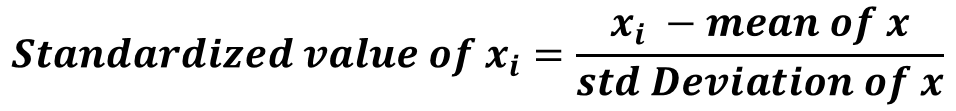

In [14]:
X_standardized = StandardScaler().fit_transform(X)

# Eigen Values and Eigen Vectors:

In [15]:
# Covariance Matrix
covariance_matrix = np.cov(X_standardized.T)
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)
print('Eigenvectors \n%s' %covariance_matrix)
print('Eigenvectors \n%s' %eig_vecs)
print('Eigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]
Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]
Eigenvalues 
[2.93035378 0.92740362 0.14834223 0.02074601]


**Heatmap**

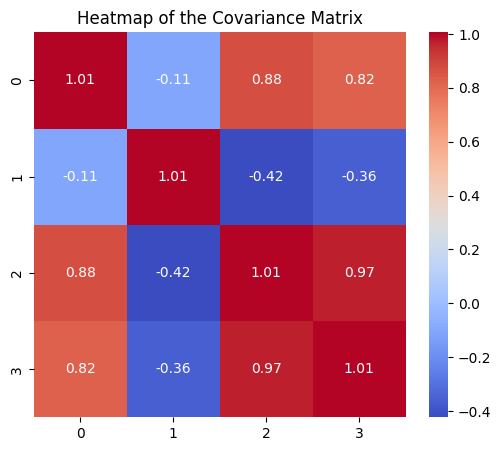

In [16]:
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap of the Covariance Matrix")
plt.show()

## Eigen Vectors verification:

The sum of the squares of each value in an Eigenvector should equal 1. Let's verify this to confirm that we have computed the Eigenvectors correctly.

In [17]:
square_eig = [vec**2 for vec in eig_vecs]

print(square_eig)

[array([0.27287211, 0.13862096, 0.51986524, 0.06864169]), array([0.06935581, 0.85665482, 0.05857991, 0.01540945]), array([3.37856219e-01, 4.44989610e-04, 1.98506285e-02, 6.41848163e-01]), array([0.31991586, 0.00427922, 0.40170422, 0.2741007 ])]


In [18]:
sum_of_squares = np.sum(square_eig, axis=0)
print(f"\nSum of squares of each eigenvector component: \n{sum_of_squares}")

# Performing a check to confirm the norm (magnitude) of each eigenvector is 1
for eigenvector in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(eigenvector))


Sum of squares of each eigenvector component: 
[1. 1. 1. 1.]


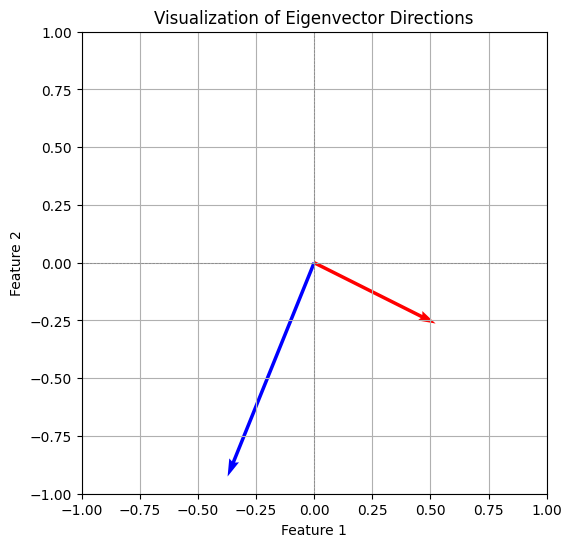

In [19]:
origin = np.zeros((2,2))  # Starting point
plt.figure(figsize=(6, 6))

plt.quiver(*origin, eig_vecs[0, :2], eig_vecs[1, :2], color=['r', 'b'], angles='xy', scale_units='xy', scale=1)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axhline(0, color='grey', linestyle='--', linewidth=0.5)
plt.axvline(0, color='grey', linestyle='--', linewidth=0.5)
plt.grid(True)
plt.title("Visualization of Eigenvector Directions")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


# Selecting the K Principal Components:

The basic rule is to sort the eigenvalues in descending order and then pick the top k features that correspond to the largest eigenvalues.
The idea behind this is that by choosing the top k, we are assuming that the variance associated with those k components is enough to represent the dataset. Ignoring the variance from the remaining components doesn't significantly impact the accuracy, or the loss in accuracy due to the ignored variance is acceptable. This decision depends on the specific problem and business case. There's no perfect rule to follow; it should be based on the context.

In [20]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print(f"Type of eig_pairs: {type(eig_pairs)}")

eig_pairs.sort(key=lambda x: x[0], reverse=True)
print("\nEigen Pairs Sorted:\n", eig_pairs)

# Display eigenvalues in descending order and store sorted values and vectors
print('\nEigenvalues in descending order:')
sorted_eigen_values = [pair[0] for pair in eig_pairs]
sorted_eigen_vectors = [list(pair[1]) for pair in eig_pairs]

# Print sorted eigenvalues
for eigenvalue in sorted_eigen_values:
    print(eigenvalue)

sorted_eigen_vectors

Type of eig_pairs: <class 'list'>

Eigen Pairs Sorted:
 [(2.930353775589317, array([ 0.52237162, -0.26335492,  0.58125401,  0.56561105])), (0.9274036215173419, array([-0.37231836, -0.92555649, -0.02109478, -0.06541577])), (0.14834222648163944, array([-0.72101681,  0.24203288,  0.14089226,  0.6338014 ])), (0.02074601399559593, array([ 0.26199559, -0.12413481, -0.80115427,  0.52354627]))]

Eigenvalues in descending order:
2.930353775589317
0.9274036215173419
0.14834222648163944
0.02074601399559593


[[0.5223716204076599,
  -0.2633549153139403,
  0.5812540055976477,
  0.5656110498826491],
 [-0.3723183633499689,
  -0.9255564941472946,
  -0.021094776841246433,
  -0.06541576907892797],
 [-0.7210168090620422,
  0.24203287721394123,
  0.14089225848754092,
  0.633801403355824],
 [0.2619955868999825,
  -0.1241348100626826,
  -0.8011542690799242,
  0.5235462716041895]]

This code first creates a list of tuples, where each tuple contains an absolute eigenvalue and its corresponding eigenvector. It then sorts these tuples in descending order based on the eigenvalues, ensuring that the most significant components come first. After sorting, it extracts the sorted eigenvalues and eigenvectors into separate lists. Finally, it prints the eigenvalues in descending order to confirm the correct sorting. This approach is commonly used in Principal Component Analysis (PCA) to prioritize the most important features in the dataset.

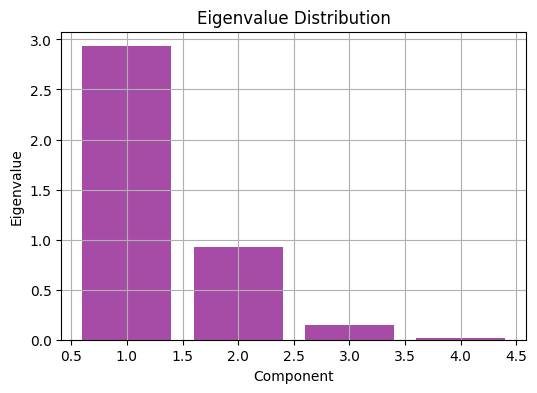

In [21]:
plt.figure(figsize=(6, 4))
plt.bar(range(1, len(eig_vals) + 1), sorted_eigen_values, color='purple', alpha=0.7)
plt.xlabel("Component")
plt.ylabel("Eigenvalue")
plt.title("Eigenvalue Distribution")
plt.grid(True)
plt.show()

## Explained Variance :

Explained variance is a key metric derived from eigenvalues that helps us understand how much of the total information (variance) in the dataset is captured by each principal component. In other words, it indicates the contribution of each principal component in representing the overall structure of the data. The higher the explained variance of a component, the more significant it is in preserving the original data’s characteristics.

In [22]:
# Determine the eigenvalues' total sum.
total_eigenvalue = sum(eig_vals)
print(total_eigenvalue)

# Determine the percentage of variance that each eigenvalue
explained_variance = [(i / total_eigenvalue) * 100 for i in sorted(eig_vals, reverse=True)]
print("\n1. Variance Explained:", explained_variance)

# Calculate cumulative explained variance across the principal components
cumulative_variance = np.cumsum(explained_variance)
print("\n2. Cumulative Variance Explained:", cumulative_variance)
print("\n3. Percentage of variance explained by the first two components:", explained_variance[0:2])
print("\n4. Total variance explained by the first two components:", sum(explained_variance[0:2]))


4.026845637583894

1. Variance Explained: [72.77045209380135, 23.03052326768065, 3.683831957627379, 0.5151926808906321]

2. Cumulative Variance Explained: [ 72.77045209  95.80097536  99.48480732 100.        ]

3. Percentage of variance explained by the first two components: [72.77045209380135, 23.03052326768065]

4. Total variance explained by the first two components: 95.800975361482


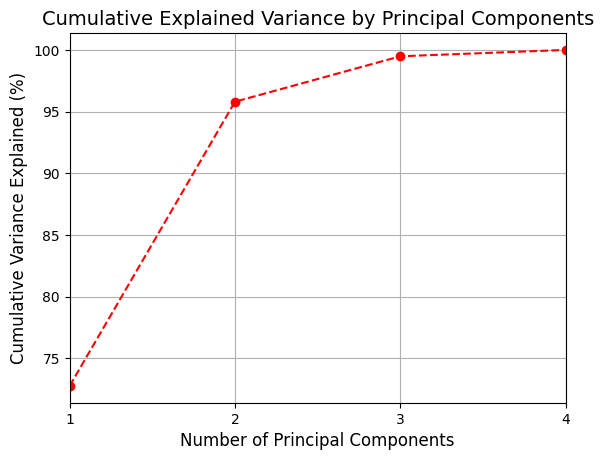

In [23]:
component_range = range(1, len(cumulative_variance) + 1)
plt.plot(component_range, cumulative_variance, marker='o', linestyle='--', color='r')

plt.xlabel("Number of Principal Components", fontsize=12)
plt.ylabel("Cumulative Variance Explained (%)", fontsize=12)
plt.xticks(component_range)
plt.xlim(1, len(cumulative_variance))
plt.title("Cumulative Explained Variance by Principal Components", fontsize=14)
plt.grid(True)
plt.show()

From the plot, it is clear that more than 95% of the total variance is explained by the first two principal components. As a result, selecting these two largest components to form the projection matrix
**𝑊** is a reasonable choice.

## W from the selected k eigenvectors:

The projection matrix **W**   is created by selecting the top **𝑘** eigenvectors. This matrix is used to map the original Iris data into a new subspace with fewer dimensions.

The projection matrix consists of the eigenvectors that were selected.
In this scenario, we reduce the 4-dimensional feature space to a 2-dimensional one by picking the two eigenvectors with the largest eigenvalues. The resulting matrix W is a **𝑑×𝑘**-dimensional matrix, where **𝑑** is the number of features and **𝑘** is the number of selected eigenvectors.



In [24]:
print("First Eigenvector:", eig_pairs[0][1])
print("Second Eigenvector:", eig_pairs[1][1])

# Creating the projection matrix by stacking the top 2 eigenvectors
matrix_W = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))
print("\nProjection Matrix W:\n", matrix_W)

First Eigenvector: [ 0.52237162 -0.26335492  0.58125401  0.56561105]
Second Eigenvector: [-0.37231836 -0.92555649 -0.02109478 -0.06541577]

Projection Matrix W:
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


## Projecting the data onto the new feature space (2D)

In [25]:
Y = X_standardized.dot(matrix_W)
principal_components = pd.DataFrame(data=Y, columns=['PC1', 'PC2'])
principal_components.head()

,PC1,PC2
0,-2.264542,-0.505704
1,-2.086426,0.655405
2,-2.367950,0.318477
3,-2.304197,0.575368
4,-2.388777,-0.674767


Combining the principal components with the target labels (species)

---




In [26]:
final_df = pd.concat([principal_components, pd.DataFrame(y, columns=['species'])], axis=1)
final_df.head()

,PC1,PC2,species
0,-2.264542,-0.505704,Iris-setosa
1,-2.086426,0.655405,Iris-setosa
2,-2.367950,0.318477,Iris-setosa
3,-2.304197,0.575368,Iris-setosa
4,-2.388777,-0.674767,Iris-setosa


 Visualizing the data points in the new 2D feature space

---



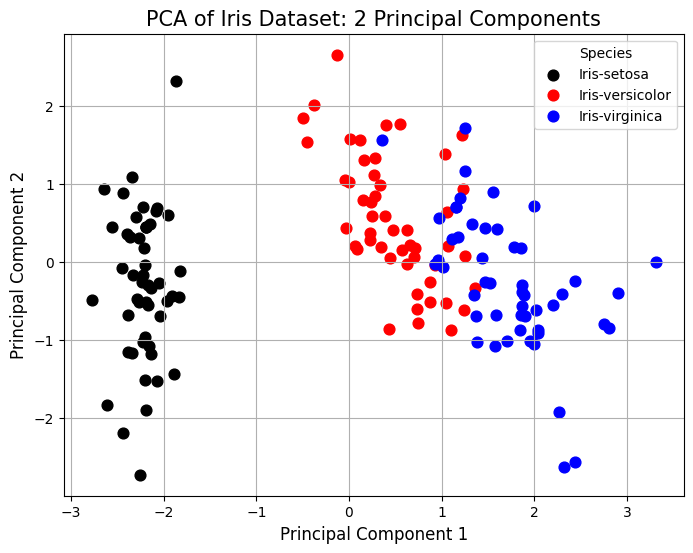

In [27]:
plt.figure(figsize=(8, 6))
plt.title('PCA of Iris Dataset: 2 Principal Components', fontsize=15)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)

# Mapping the species to different colors
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
color_map = {'Iris-setosa': 'black', 'Iris-versicolor': 'r', 'Iris-virginica': 'b'}

for species_name in species:
    subset = final_df[final_df['species'] == species_name]
    plt.scatter(subset['PC1'], subset['PC2'], label=species_name, color=color_map[species_name], s=60)

plt.legend(title="Species")
plt.grid(True)
plt.show()